In [1]:
!wget https://raw.githubusercontent.com/JunoJupyter/CL_653-Project/main/data/Agrofood_co2_emission.csv

--2024-04-25 13:59:29--  https://raw.githubusercontent.com/JunoJupyter/CL_653-Project/main/data/Agrofood_co2_emission.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2047366 (2.0M) [text/plain]
Saving to: ‘Agrofood_co2_emission.csv’

Agrofood_co2_emissi 100%[===================>]   1.95M  --.-KB/s    in 0.06s   

2024-04-25 13:59:30 (32.9 MB/s) - ‘Agrofood_co2_emission.csv’ saved [2047366/2047366]



In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [37]:
ayush_df = pd.read_csv('/content/Agrofood_co2_emission.csv')
ayush_df.head()

# Create a directory to save plots if it doesn't exist
if not os.path.exists("plots"):
    os.makedirs("plots")

In [14]:
ayush_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [15]:
ayush_df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


In [16]:
ayush_df.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [17]:
# Replacing missing values with the mean of the column


for column in ayush_df.columns:
    if ayush_df[column].dtype != 'object':  # Check if the column is numerical
        ayush_df[column].fillna(ayush_df[column].mean(), inplace=True)

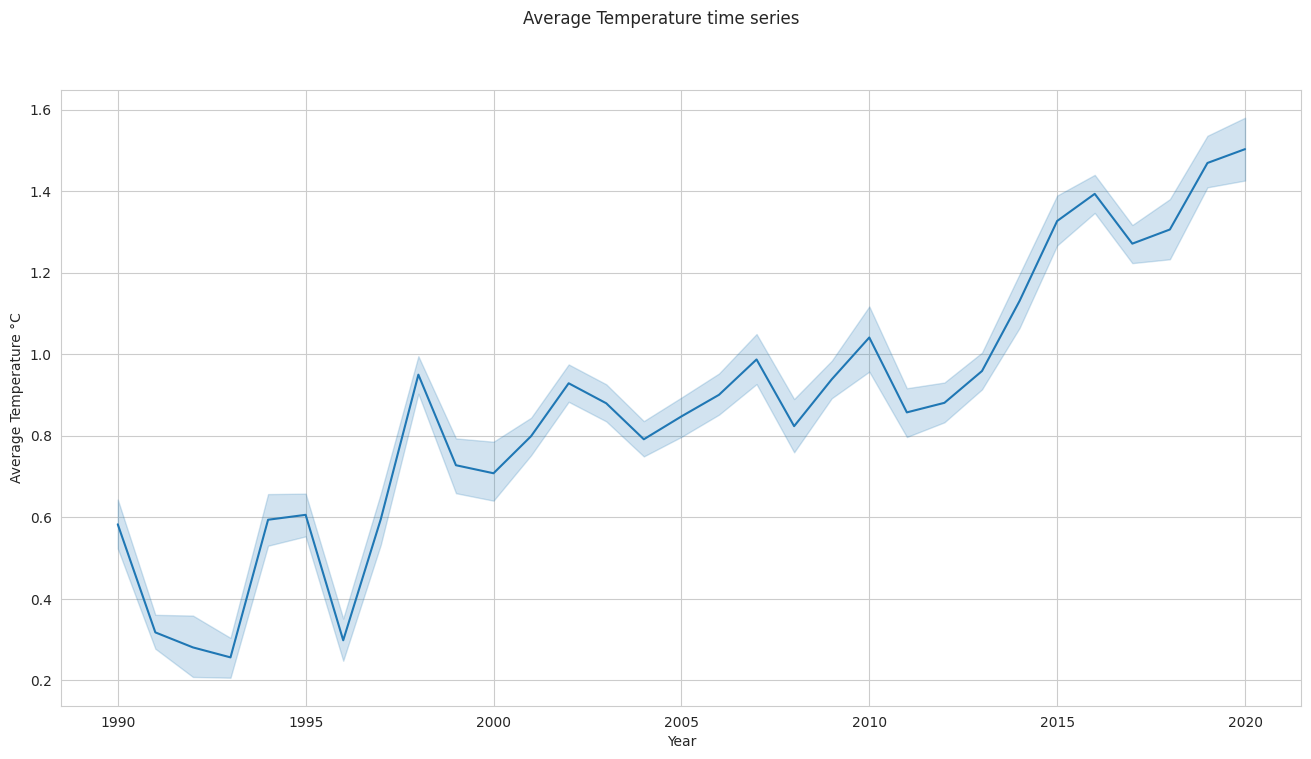

In [38]:
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(16, 8))

sns.lineplot(data=ayush_df, x='Year', y='Average Temperature °C', ax=ax)
fig.suptitle('Average Temperature time series')
plt.savefig("plots/avgTempSeries.png")

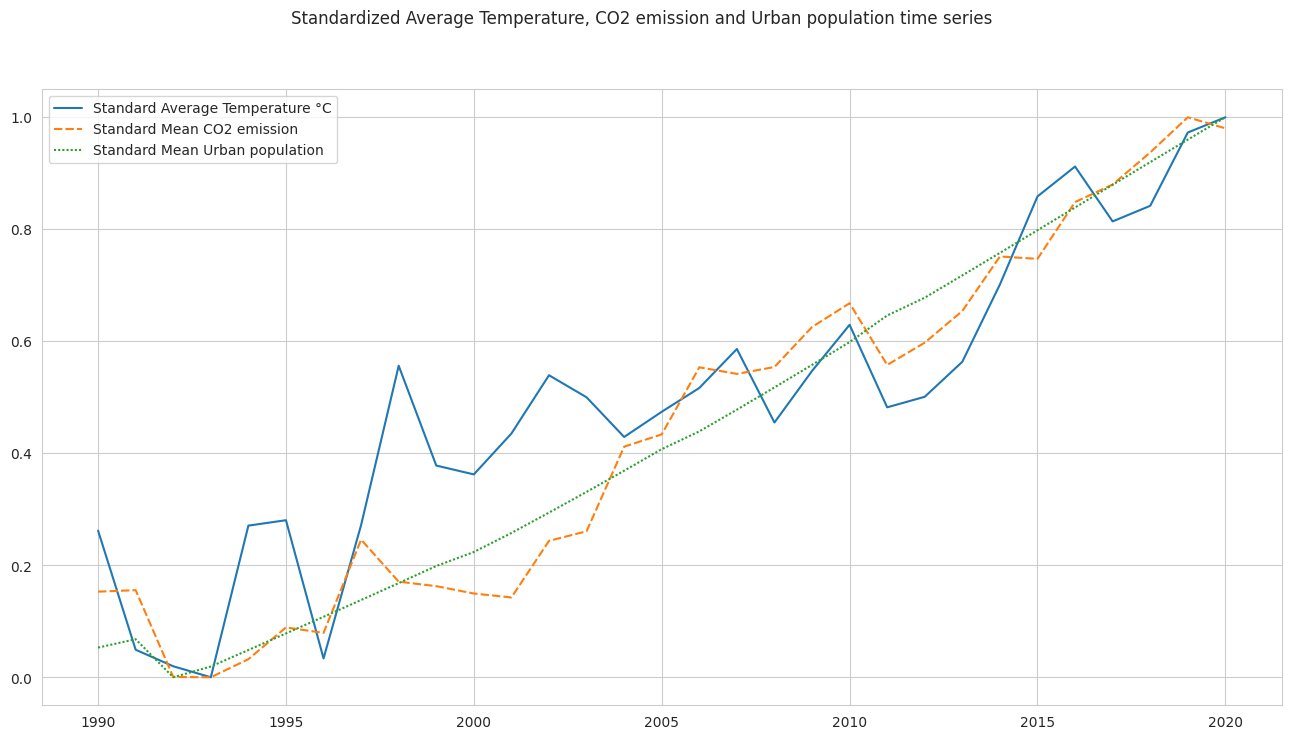

In [39]:
''' relaitonship among the target varibale (temperature), the average annual CO2 emission and the Urban population.'''

scaler = MinMaxScaler()

temp_emission = ayush_df.groupby('Year').agg({'Average Temperature °C': 'mean', 'total_emission': 'mean', 'Urban population': 'mean'})

norm_emission= scaler.fit_transform(temp_emission)

temp_df = pd.DataFrame(norm_emission, columns=['Standard Average Temperature °C', 'Standard Mean CO2 emission', 'Standard Mean Urban population'])
temp_df.index = [i for i in range(1990, 2021)]

fig, ax = plt.subplots(figsize=(16, 8))

g = sns.lineplot(data=temp_df, ax=ax)

fig.suptitle('Standardized Average Temperature, CO2 emission and Urban population time series')

plt.plot()
plt.savefig("plots/TempEmissionPopulation.png")


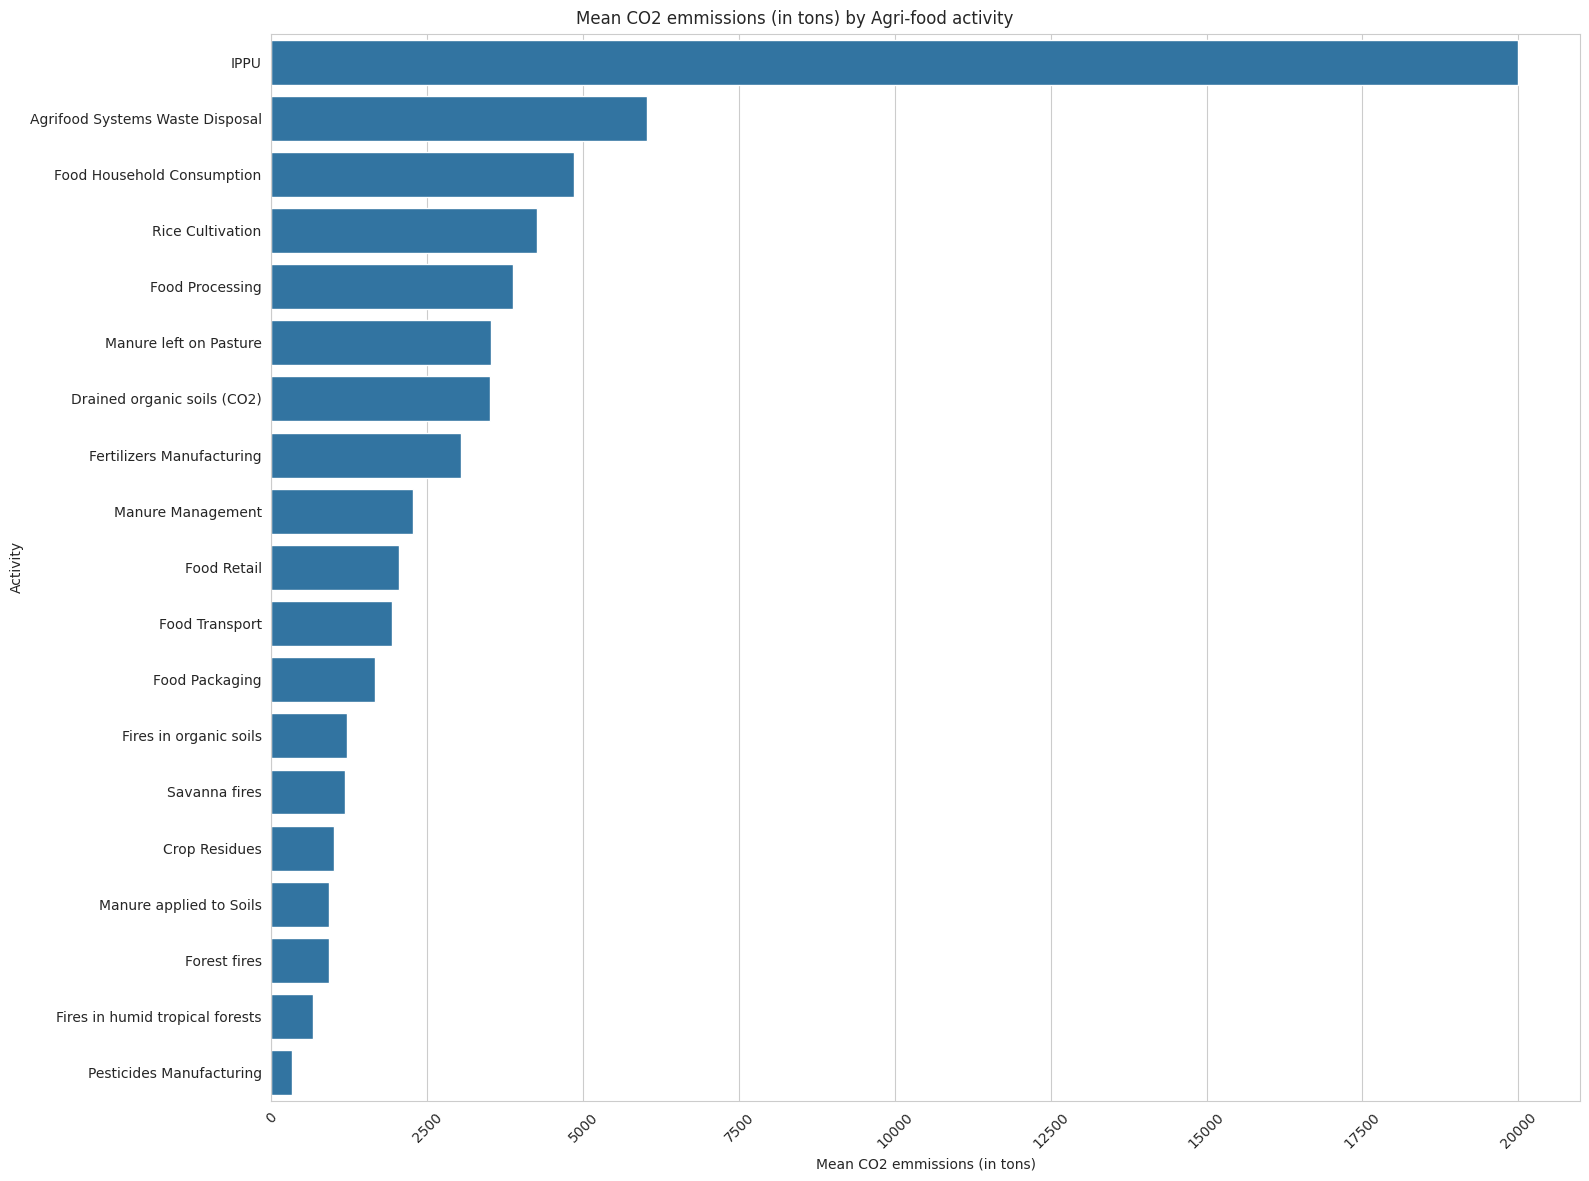

<Figure size 640x480 with 0 Axes>

In [40]:
temp = ayush_df.iloc[:, 2: -7].copy() # Do not include the first and second column as it is area and year

delete_list = ['Forestland', 'Net Forest conversion', 'On-farm Electricity Use'] #rule out all non-relevant features

temp = temp.drop(delete_list, axis = 1)
means = temp.mean()#calculate the mean anual values for each feature

means.sort_values(ascending = False, inplace = True) #sort them in descending order

cols = means.index #the column names are the indices

fig, ax = plt.subplots(figsize=(16, 12))
sns.barplot(x=means, y=cols, ax=ax) #wrap x and y parameters

ax.set_ylabel("Activity")  # Set the y-axis label
ax.set_xlabel("Mean CO2 emmissions (in tons)")     # Set the x-axis label
fig.suptitle('Mean CO2 emmissions (in tons) by Agri-food activity')

plt.xticks(rotation=45)      # Rotate x-axis labels for better visibility
plt.tight_layout()           # Adjust layout to prevent labels from getting cut off
plt.show()
plt.savefig("plots/MeanEmission.png")

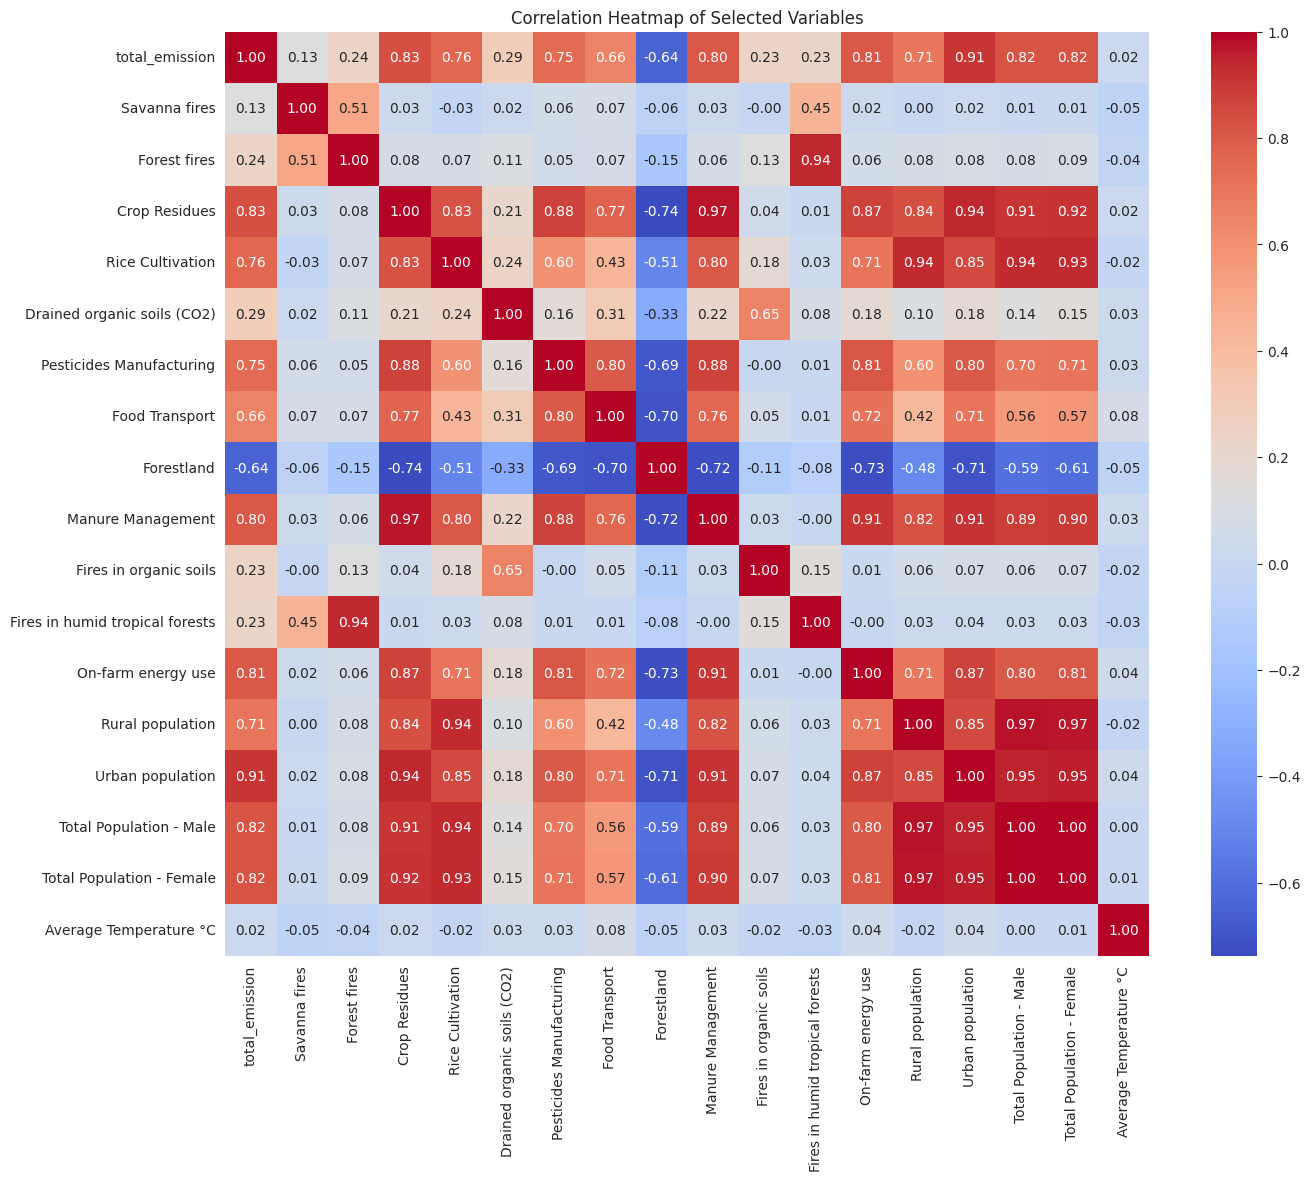

<Figure size 640x480 with 0 Axes>

In [41]:
variables = ['total_emission', 'Savanna fires', 'Forest fires', 'Crop Residues',
             'Rice Cultivation', 'Drained organic soils (CO2)', 'Pesticides Manufacturing',
             'Food Transport', 'Forestland', 'Manure Management',
             'Fires in organic soils', 'Fires in humid tropical forests',
             'On-farm energy use', 'Rural population', 'Urban population',
             'Total Population - Male', 'Total Population - Female',
             'Average Temperature °C']

selected_data = ayush_df[variables]

# Calculate the correlation matrix
correlation_matrix_selected = selected_data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()
plt.savefig("plots/correlationMatrix.png")

In [23]:
X=ayush_df[['Year', 'Food Transport', 'Food Household Consumption', 'Food Retail',
       'Food Packaging', 'Food Processing', 'IPPU', 'Fires in organic soils',
       'Fires in humid tropical forests', 'total_emission']]

y = ayush_df['Average Temperature °C']

In [24]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=16)

In [26]:
#linear regression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)

print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error: 0.33917548007271603
mean squared error: 0.20101401964303303
root mean squared error: 0.448345870554233
r2-score: 0.32829864364532846


In [27]:
# Random Forest Regressor

rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred1=rf_model.predict(X_test)
y_pred1
print("mean absolute error:",mean_absolute_error(y_test,y_pred1))
print("mean squared error:",mean_squared_error(y_test,y_pred1))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2 score:",r2_score(y_test,y_pred1))

mean absolute error: 0.2651374120980915
mean squared error: 0.13434654749052924
root mean squared error: 0.36653314651001107
R2 score: 0.5510723165916083


In [28]:
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred3=gb.predict(X_test)
y_pred3
print("mean absolute error:",mean_absolute_error(y_test,y_pred3))
print("mean squared error:",mean_squared_error(y_test,y_pred3))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred3)))
print("R2 score:",r2_score(y_test,y_pred3))

mean absolute error: 0.28923852438933406
mean squared error: 0.1557744737998289
root mean squared error: 0.3946827508263173
R2 score: 0.47946951400408544


In [30]:
# Ada Boost Regressor

ad=AdaBoostRegressor()
ad.fit(X_train,y_train)
y_pred4=gb.predict(X_test)
y_pred4
print("mean absolute error:",mean_absolute_error(y_test,y_pred4))
print("mean squared error:",mean_squared_error(y_test,y_pred4))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred4)))
print("R2 score:",r2_score(y_test,y_pred4))

mean absolute error: 0.28923852438933406
mean squared error: 0.1557744737998289
root mean squared error: 0.3946827508263173
R2 score: 0.47946951400408544


In [31]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
y_pred5=xgb.predict(X_test)
y_pred5
print("mean absolute error:",mean_absolute_error(y_test,y_pred5))
print("mean squared error:",mean_squared_error(y_test,y_pred5))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred5)))
print("R2 score:",r2_score(y_test,y_pred5))

mean absolute error: 0.26353525051536664
mean squared error: 0.13464005016505015
root mean squared error: 0.36693330479127967
R2 score: 0.5500915584090719


In [32]:
# Create SVR model
svr = SVR()

# Fit SVR model
svr.fit(X_train, y_train)

# Predict using SVR model
y_pred_svr = svr.predict(X_test)

# Calculate evaluation metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print evaluation metrics
print("SVR:")
print("mean absolute error:", mae_svr)
print("mean squared error:", mse_svr)
print("root mean squared error:", rmse_svr)
print("r2-score:", r2_svr)

SVR:
mean absolute error: 0.3298636063342524
mean squared error: 0.195187268450612
root mean squared error: 0.4418000321985185
r2-score: 0.34776910986475296


In [33]:
# Hyperparameter Tuning in each model:

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

lr_metrics = {
    "mean absolute error": mean_absolute_error(y_test, y_pred_lr),
    "mean squared error": mean_squared_error(y_test, y_pred_lr),
    "root mean squared error": np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    "r2-score": r2_score(y_test, y_pred_lr)
}

# RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_metrics = {
    "mean absolute error": mean_absolute_error(y_test, y_pred_rf),
    "mean squared error": mean_squared_error(y_test, y_pred_rf),
    "root mean squared error": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    "r2-score": r2_score(y_test, y_pred_rf)
}

# GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

gb_metrics = {
    "mean absolute error": mean_absolute_error(y_test, y_pred_gb),
    "mean squared error": mean_squared_error(y_test, y_pred_gb),
    "root mean squared error": np.sqrt(mean_squared_error(y_test, y_pred_gb)),
    "r2-score": r2_score(y_test, y_pred_gb)
}

# AdaBoostRegressor
ad_model = AdaBoostRegressor()
ad_model.fit(X_train, y_train)
y_pred_ad = ad_model.predict(X_test)

ad_metrics = {
    "mean absolute error": mean_absolute_error(y_test, y_pred_ad),
    "mean squared error": mean_squared_error(y_test, y_pred_ad),
    "root mean squared error": np.sqrt(mean_squared_error(y_test, y_pred_ad)),
    "r2-score": r2_score(y_test, y_pred_ad)
}

# XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

xgb_metrics = {
    "mean absolute error": mean_absolute_error(y_test, y_pred_xgb),
    "mean squared error": mean_squared_error(y_test, y_pred_xgb),
    "root mean squared error": np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    "r2-score": r2_score(y_test, y_pred_xgb)
}

# SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

svr_metrics = {
    "mean absolute error": mean_absolute_error(y_test, y_pred_svr),
    "mean squared error": mean_squared_error(y_test, y_pred_svr),
    "root mean squared error": np.sqrt(mean_squared_error(y_test, y_pred_svr)),
    "r2-score": r2_score(y_test, y_pred_svr)
}

# Print metrics for each model
print("Linear Regression Metrics:")
for key, value in lr_metrics.items():
    print(f"{key}: {value}")

print("\nRandom Forest Metrics:")
for key, value in rf_metrics.items():
    print(f"{key}: {value}")

print("\nGradient Boosting Metrics:")
for key, value in gb_metrics.items():
    print(f"{key}: {value}")

print("\nAdaBoost Metrics:")
for key, value in ad_metrics.items():
    print(f"{key}: {value}")

print("\nXGBoost Metrics:")
for key, value in xgb_metrics.items():
    print(f"{key}: {value}")

print("\nSVR Metrics:")
for key, value in svr_metrics.items():
    print(f"{key}: {value}")

Linear Regression Metrics:
mean absolute error: 0.33917548007271603
mean squared error: 0.20101401964303303
root mean squared error: 0.448345870554233
r2-score: 0.32829864364532846

Random Forest Metrics:
mean absolute error: 0.2640083679082405
mean squared error: 0.1330843675796708
root mean squared error: 0.36480730198239014
r2-score: 0.5552899724525915

Gradient Boosting Metrics:
mean absolute error: 0.2894037031604127
mean squared error: 0.15579350296533523
root mean squared error: 0.39470685700318814
r2-score: 0.4794059268159697

AdaBoost Metrics:
mean absolute error: 0.3372550596910862
mean squared error: 0.19514815606990815
root mean squared error: 0.4417557651801594
r2-score: 0.34789980641624574

XGBoost Metrics:
mean absolute error: 0.26353525051536664
mean squared error: 0.13464005016505015
root mean squared error: 0.36693330479127967
r2-score: 0.5500915584090719

SVR Metrics:
mean absolute error: 0.3298636063342524
mean squared error: 0.195187268450612
root mean squared erro